# Introduction to Regression with neural network in TF
There are many defination for a regression prob but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter.... **`predicting a number`**

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
print(tf.__version__)

2.17.0


### Creating a data to view and fit

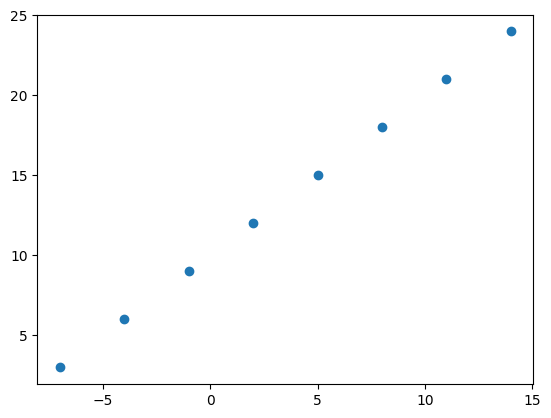

In [ ]:
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualise it
plt.scatter(X, y);

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shape

In [ ]:
# Let's create a demo tensor for our housing price prediction
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

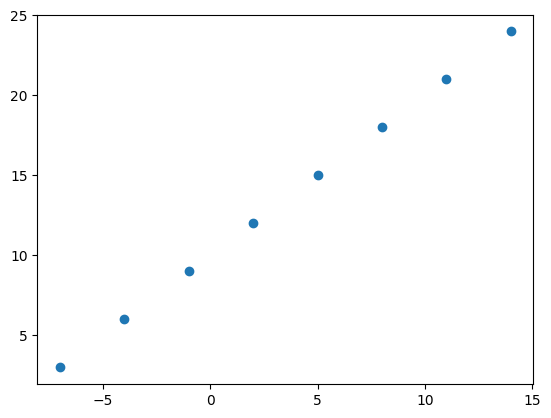

In [ ]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow
* `Creating a model`: define the input and output layers, as well as the hidden layers of a deep learning model.
* `Compiling a model`: define the loss function (in other words, the func which tells our model how wring it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
* `Fitting a model`: letting the model try to find the patterns between X and y (features and label)

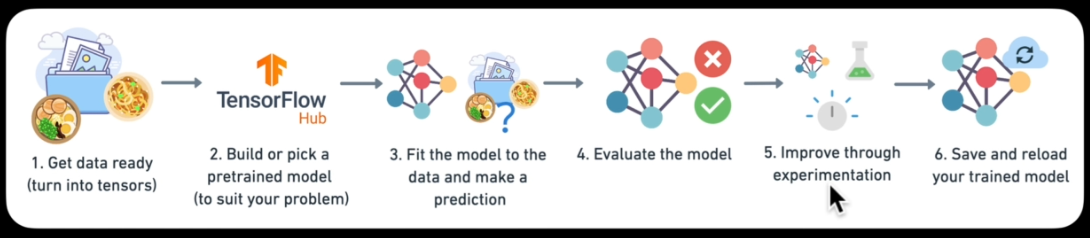

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # SGD - stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.7403 - mae: 14.7403
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 14.6078 - mae: 14.6078
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 14.4753 - mae: 14.4753
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 14.3428 - mae: 14.3428
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 14.2103 - mae: 14.2103
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 14.0778 - mae: 14.0778
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 13.9453 - mae: 13.9453
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 13.8128 - mae: 13.8128
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 13.6803 - mae: 13.6803
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.5478 - mae: 13.5478


In [ ]:
# Check X, y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets try and predict
model.predict(tf.constant([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


array([[0.02575412]], dtype=float32)

In [ ]:
 # Lets try and predict
model.predict(np.array([17.0])) #throws error - pass array or tensors

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0.02575412]], dtype=float32)

### **Improving models with tensorflow**
We can improve our model by altering the steps we took to create our mode
1. **`Creating a model`** - add more layer, increase no of hidden units(neurons), change the activation function
2. **`Compiing a model`** - here we might change the optimization function or perhaps the **learning rate** of the optimisation function
3. **`Fitting a model`** - here we might fit a model for more epochs, (leave it for training for longer) or on more data (give the model more examples to learn from)


In [ ]:
# Lets create a larger model

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13.0920 - mae: 13.0920
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 12.9809 - mae: 12.9809
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 12.8696 - mae: 12.8696
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.7581 - mae: 12.7581
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.6465 - mae: 12.6465
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.5346 - mae: 12.5346
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 12.4226 - mae: 12.4226
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 12.3103 - mae: 12.3103
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 12.1977 - mae: 12.1977
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 12.0847 - mae: 12.0847
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 11.9715 - mae: 11.9715
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 11.8578 - mae: 11.8578
Epoch 13/500
1/1 ━━

In [ ]:
model.predict(tf.constant([55]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[66.311806]], dtype=float32)

### Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

`
Build a model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak it -> ...
`

When it comes to evaluation ... there are 3 words you should memorize:

> visualize, visualize, visualize

It's a good idea to visualize:
* The data - What data are we working with? What does it look like?
* Model Itself - what our model does look like
* The training of a model - how does a model performs while it learns
* The prediction of the model - how to the prediction of the model line up against the ground truth (original labels)

In [ ]:
# Make bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make the lablels
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

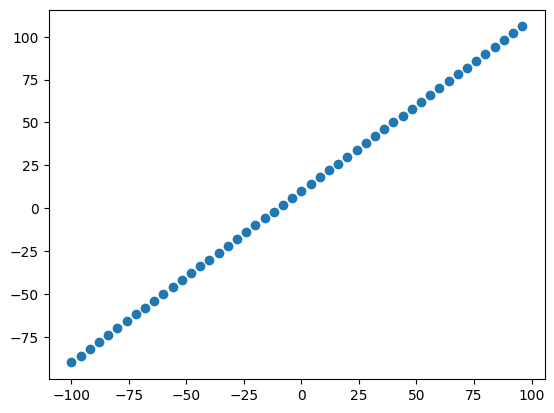

In [ ]:
# Visualize the data
plt.scatter(X, y)

### The three Sets
* `Training Set` - 70-80% (Used for model training)
* `Validation set` - 10-15% (used for model tuning)
* `Test Set` - 10-15% (Used for evaluation)

In [ ]:
len(X)

50

In [ ]:
# Split the data in training and testing
x_train = X[:40]
x_test = X[40:]

y_train = y[:40]
y_test = y[40:]

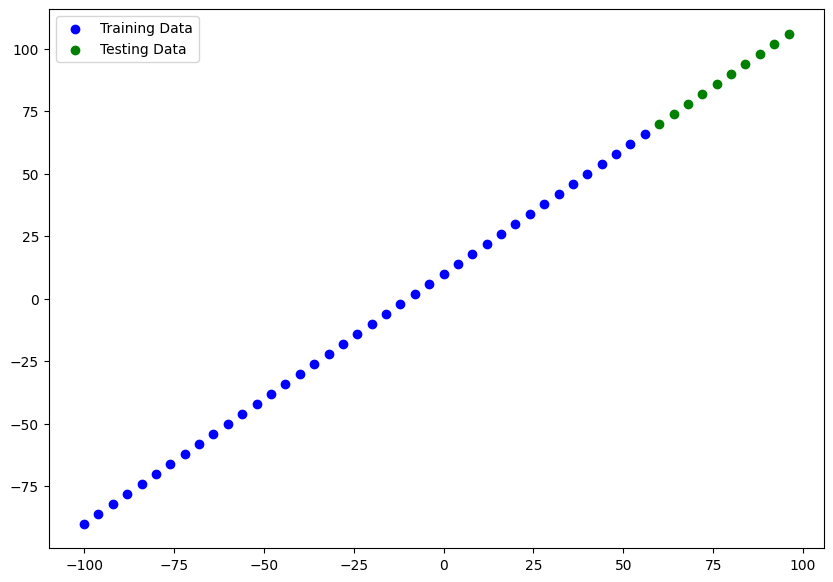

In [ ]:
# Visualing the data
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c="b", label="Training Data")
plt.scatter(x_test, y_test, c="g", label="Testing Data")
plt.legend();

In [ ]:
# Let's have a look how to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=50)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape arguement
tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    # tf.keras.layers.Dense(100)
    # tf.keras.layers.Dense(100),
    # tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Lets fit our model

model.fit(tf.expand_dims(x_train, axis=-1), y_train, verbose=1, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.3485 - mae: 15.3485 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6578 - mae: 8.6578 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8734 - mae: 8.8734 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1946 - mae: 9.1946 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1107 - mae: 8.1107 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1638 - mae: 7.1638 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9505 - mae: 7.9505 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3586 - mae: 7.3586 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5723 - mae: 6.5723 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8908 - mae: 6.8908 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4054 - mae: 6.4054 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4372 - mae: 6.4372 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

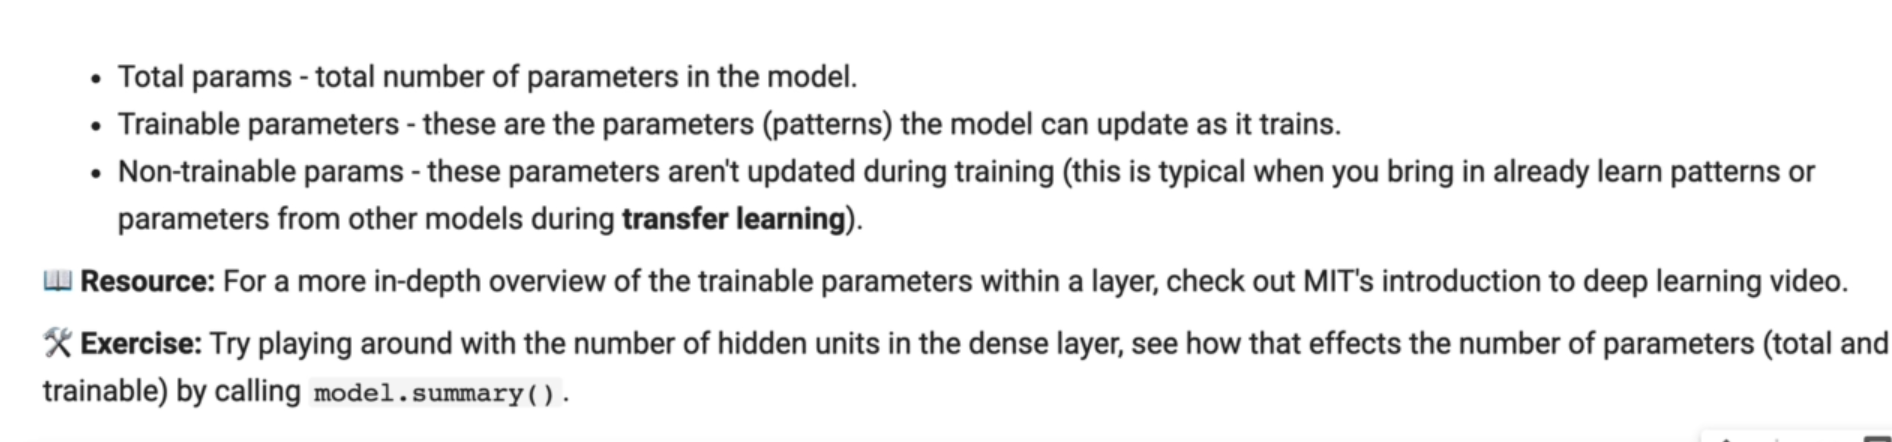

In [ ]:
model.predict([17.0])

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

In [ ]:
# pip install pydot

In [ ]:
# pip install graphviz

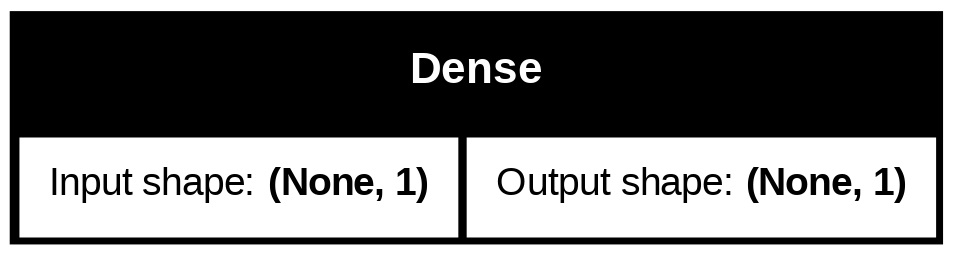

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes = True)

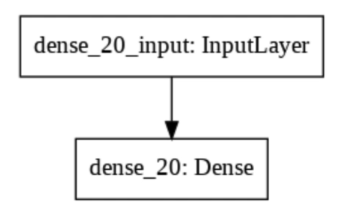

### show_shapes = True

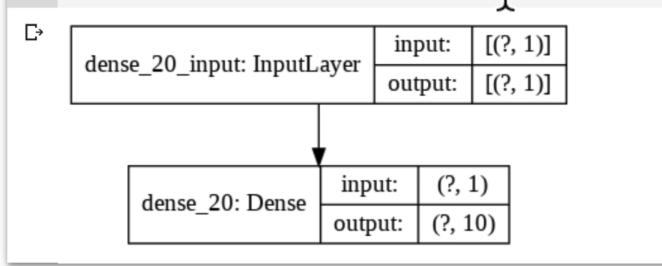

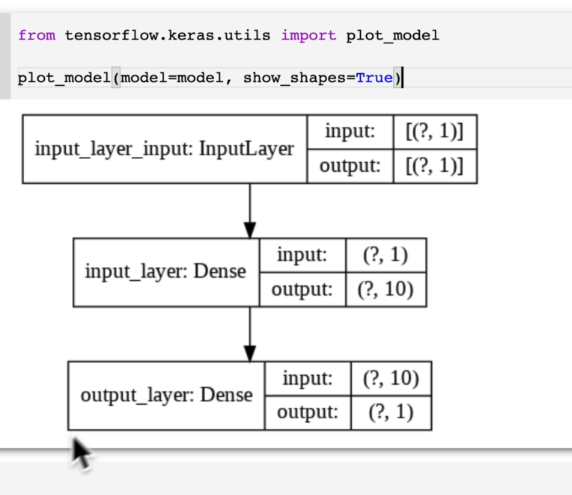

### Visualizing model's prediction

* Its a good idea to plot them against the ground truth table

* `y_test` with `y_pred`

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets make some pred
y_pred = model.predict(x_test)
y_pred = tf.squeeze(y_pred)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.770584,  73.75505 ,  77.73952 ,  81.72398 ,  85.70845 ,
        89.69292 ,  93.67739 ,  97.66186 , 101.646324, 105.63079 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_prediction(train_data = x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    predictions = y_pred):
  """
  Plots training data, test data and compared the predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label = 'Training data')
  # Plot testing data in blue
  plt.scatter(test_data, test_labels, c='g', label = 'Testing data')
  # Plot the model's prediction
  plt.scatter(test_data, predictions, c = 'r', label='Predictions')
  # Show the legend
  plt.legend();



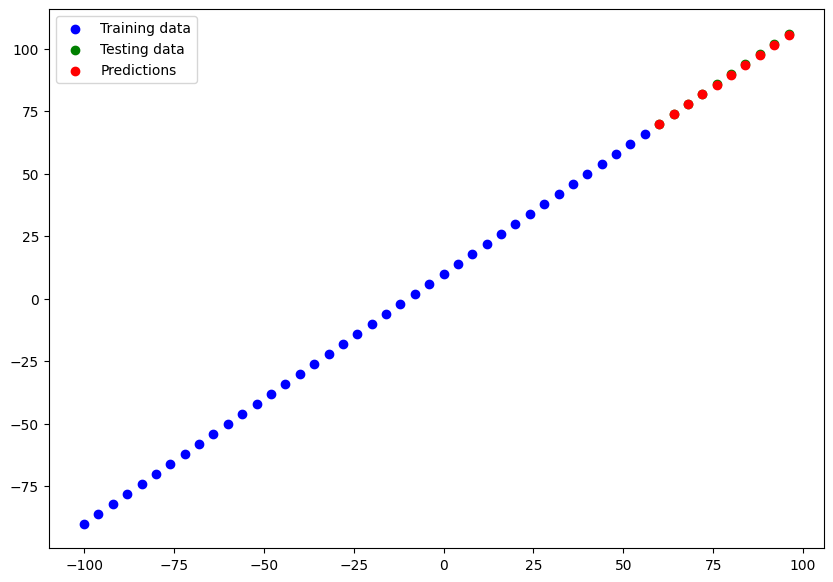

In [ ]:
plot_prediction();

### Evaluating our model's prediction with evaluation metrics

Depending upon the problem you're working there are diff eval metric

* `MAE - mean abs error`, means on average how wrong is each of my models prediction

* `MSE - mean square error`, square the avg errors

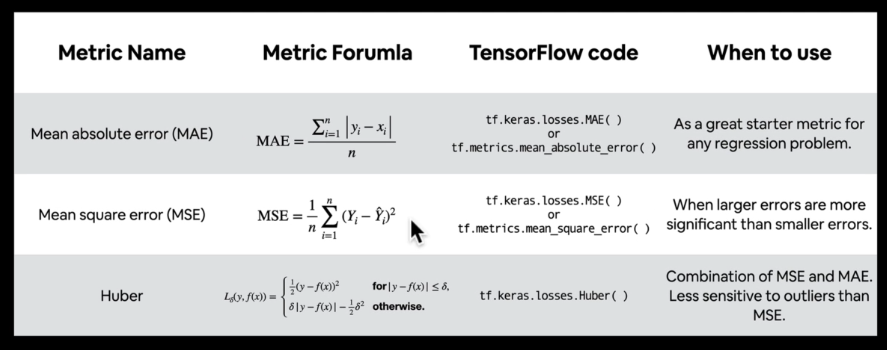

In [ ]:
# evaluate the model on the test
model.evaluate(x_test, tf.constant(y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 0.2993 - mae: 0.2993


[0.29931336641311646, 0.29931336641311646]

In [ ]:
mae = tf.metrics.mae(tf.constant(y_test), y_pred)
print(mae)

tf.Tensor(0.29931337, shape=(), dtype=float32)


In [ ]:
y_pred,y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.770584,  73.75505 ,  77.73952 ,  81.72398 ,  85.70845 ,
         89.69292 ,  93.67739 ,  97.66186 , 101.646324, 105.63079 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
mse = tf.metrics.mse(y_test, y_pred)
print(mse)

tf.Tensor(0.09157883, shape=(), dtype=float32)


In [ ]:
# Lets make the function to use MAE, MSE
def mae(y_test, y_pred):
  return tf.metrics.mae(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mse(y_test, y_pred)

## Running experiments to imporove our model

* `Get more data` : get more example for your data to train on
* `Make you model larger` : adding more layers or more hidded units in each layer
* `Train for longer` : give your model more chance of finding the patterns


Lets do 3 modelling experiments
1. `model_1` : same as original one, 1 layer, trained for 100 epochs
2. `model_2` : 2 layers, 100 epochs
3. `model_3` : 2 layers, 500 epochs


In [ ]:
# Run experiment to improve your model
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
x_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

In [ ]:
# Buuild model 1

# set the seed
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"])

# fit the model
model1.fit(np.expand_dims(x_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.9455 - mae: 14.9455 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.3362 - mae: 9.3362 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3582 - mae: 8.3582 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0753 - mae: 9.0753 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0481 - mae: 8.0481 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7752 - mae: 9.7752 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1564 - mae: 8.1564 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7004 - mae: 8.7004 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5671 - mae: 8.5671 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3346 - mae: 8.3346 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0785 - mae: 9.0785 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1492 - mae: 8.1492 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [ ]:
ypred1 = model1.predict(x_test)
ypred1 = tf.squeeze(ypred1)
ypred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.689186,  73.17422 ,  77.65925 ,  82.14428 ,  86.6293  ,
        91.114334,  95.599365, 100.08439 , 104.56942 , 109.05445 ],
      dtype=float32)>

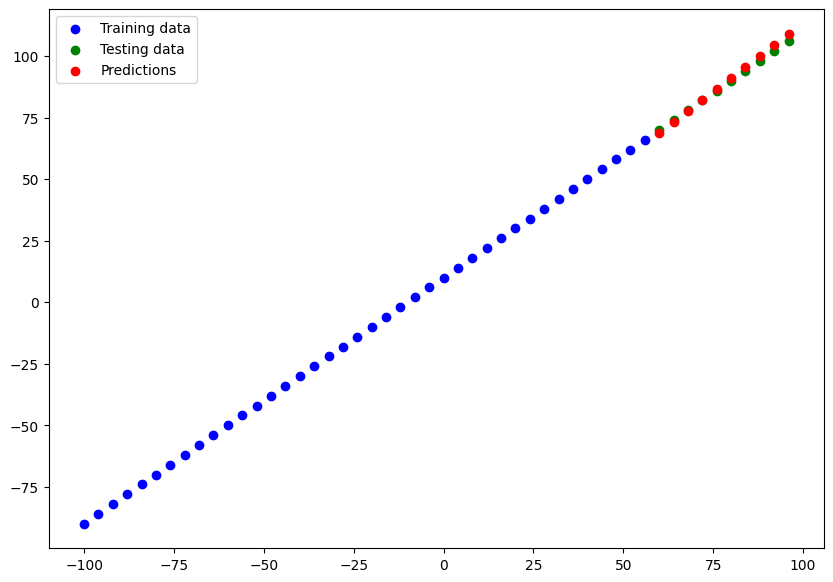

In [ ]:
plot_prediction(predictions=ypred1)

In [ ]:
# calculate the model1 evaluation metrics
mae1 = mae(y_test, tf.squeeze(ypred1))
mse1 = mse(y_test, tf.squeeze(ypred1))

mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.367289>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.7009077>)

In [ ]:
# Lets build model 2

# Set seed
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mse"])

# Fit the model
model2.fit(np.expand_dims(x_train, axis=-1), y_train, epochs = 100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 32.1843 - mse: 2117.3994
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.3410 - mse: 1202.5355
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.9105 - mse: 763.2600 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.9621 - mse: 582.3325 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.3963 - mse: 563.1893 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.0812 - mse: 444.6828 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.0422 - mse: 395.5418
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.7736 - mse: 380.0722
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8649 - mse: 220.1450 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.7805 - mse: 304.2140 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.7055 - mse: 333.0182
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.8539 - mse: 214.7946
Epoch 13/1

In [ ]:
ypred2 = model2.predict(x_test)
ypred2 = tf.squeeze(ypred2)
ypred2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.451557, 37.710995, 39.970436, 42.229874, 44.48931 , 46.74875 ,
       49.008186, 51.267624, 53.52706 , 55.786507], dtype=float32)>

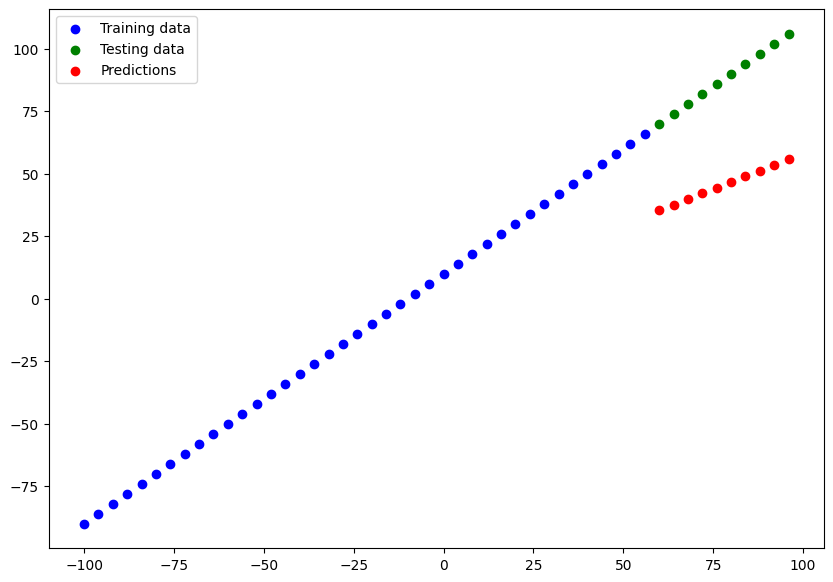

In [ ]:
plot_prediction(predictions=ypred2)

In [ ]:
# Lets calculate the eval metrics

mae2  = mae(y_test, tf.squeeze(ypred2))
mse2 = mse(y_test, tf.squeeze(ypred2))

mae2, mse2


(<tf.Tensor: shape=(), dtype=float32, numpy=42.38097>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1821.1404>)

In [ ]:
# Lets build model 3
# Set seed
tf.random.set_seed(42)

# Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"])

# Fit the model
model3.fit(np.expand_dims(x_train, axis=-1), y_train, epochs = 500)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 48.8060 - mae: 48.8060 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33.7912 - mae: 33.7912
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.4354 - mae: 11.4354 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.8933 - mae: 12.8933 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.3135 - mae: 15.3135 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5017 - mae: 10.5017
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.6423 - mae: 11.6423 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.8030 - mae: 12.8030 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.9241 - mae: 14.9241 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2500 - mae: 10.2500
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2676 - mae: 11.2676
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3370 - mae: 12.3370 
Epoch 13/500
2/2 ━━━━━━━━

In [ ]:
ypred3 = model3.predict(x_test)
ypred3 = tf.squeeze(ypred3)
ypred3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 99.67652 , 105.769165, 111.86181 , 117.95445 , 124.047104,
       130.13976 , 136.23239 , 142.32503 , 148.4177  , 154.5103  ],
      dtype=float32)>

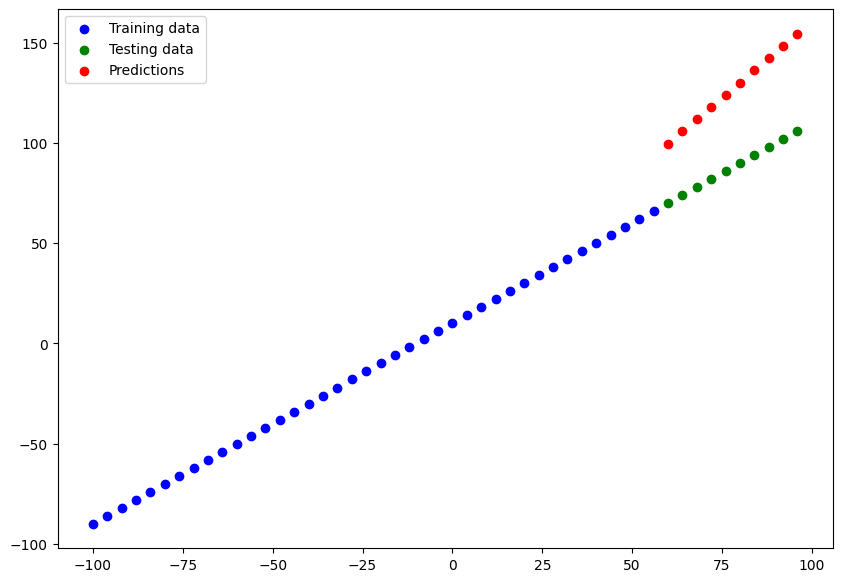

In [ ]:
plot_prediction(predictions = ypred3)

In [ ]:
# Lets eval the metricss

mae3 = mae(y_test, tf.squeeze(ypred3))
mse3 = mse(y_test, tf.squeeze(ypred3))

mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=39.093422>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1564.4236>)

## Comparing the results of diff models


In [ ]:
# Lerts compare our model's results using the pd dataframe

import pandas as pd

model_results = [["model_1", mae1.numpy(), mse1.numpy()],
                 ["model_2", mae2.numpy(), mse2.numpy()],
                 ["model_3", mae3.numpy(), mse3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,1.367289,2.700908
1,model_2,42.380970,1821.140381
2,model_3,39.093422,1564.423584


In [ ]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

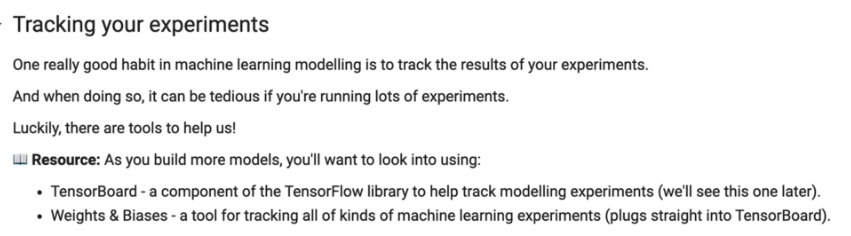

## Saving the model

1. Using the SavedModel Format
2. Using the HDF5 format

In [ ]:
# Save model using savedModel format
model2.save("bestModel_SavedModelFormat.keras")

# Save model using HDF5 format
model2.save("bestModel_HDF5format.h5")

In [ ]:
# Loading the model
loaded_model2 = tf.keras.models.load_model("bestModel_SavedModelFormat.keras")
loaded_model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
loaded_model2 = tf.keras.models.load_model('bestModel_HDF5format.h5')
loaded_model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Download a model from Google colab

1. Directly using right click
2. code
3. save to google drive


In [ ]:
from google.colab import files
files.download('bestModel_HDF5format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/bestModel_HDF5format.h5 /content/drive/MyDrive/TensorFlow_Rough

# A Larger Example


In [ ]:
# Import lib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['sex'] = insurance['sex'].replace({'male': 1, 'female': 0})
insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})
insurance['region'] = insurance['region'].replace({'southwest': 1, 'southeast': 2, 'northwest':3, 'northeast':4})

<ipython-input-84-43a1d79b83ef>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance['sex'] = insurance['sex'].replace({'male': 1, 'female': 0})
<ipython-input-84-43a1d79b83ef>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})
<ipython-input-84-43a1d79b83ef>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to t

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [ ]:
insurance_oneHot = pd.get_dummies(insurance) #its a kinda one_hot encoding
insurance_oneHot

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [ ]:
# insurance['smoker_no'] = insurance['smoker_no'].replace({True: 1, False: 0})
# insurance['smoker_yes'] = insurance['smoker_yes'].replace({True: 1, False: 0})
# insurance['sex'] = insurance['sex'].replace({'male': 1, 'female': 0})

In [ ]:
# create x and y
x = insurance_oneHot.drop('charges', axis=1)
y = insurance_oneHot['charges']


In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
# Lets create training and testing data using tf
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [ ]:
# Build the neural network

tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Dense/(10000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mae']
)

history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13203.7188 - mae: 13203.7188
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11988.5498 - mae: 11988.5498 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7979.1626 - mae: 7979.1626 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7261.1479 - mae: 7261.1479 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7199.8984 - mae: 7199.8984 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7140.0215 - mae: 7140.0215 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7073.2207 - mae: 7073.2207
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7003.9873 - mae: 7003.9873
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6926.9253 - mae: 6926.9253
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6848.0527 - mae: 6848.0527
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6767.4800 - mae: 6767.4800
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3263.8015 - mae: 3263.8015  


[3218.458251953125, 3218.458251953125]

Text(0.5, 0, 'epochs')

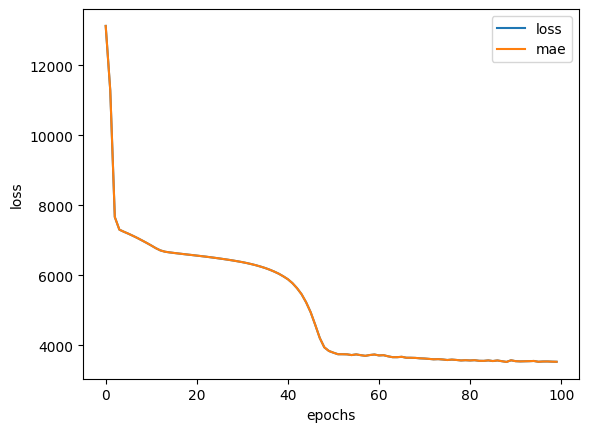

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing the data (Normalisation and standardization)

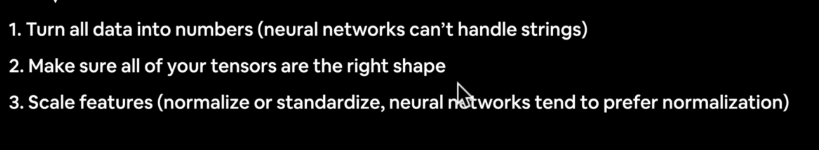

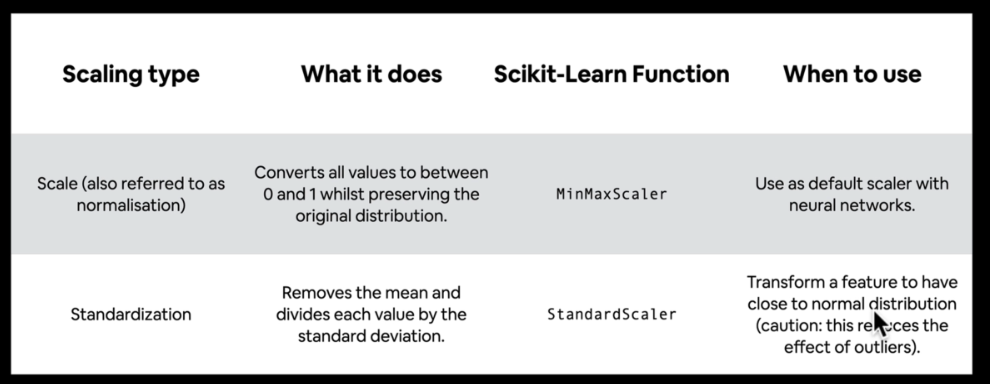

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


<Axes: ylabel='Frequency'>

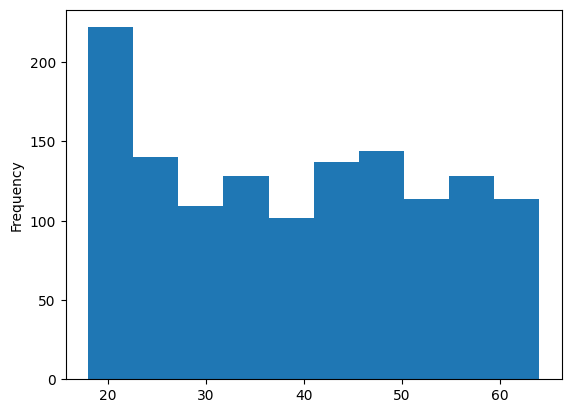

In [ ]:
x['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

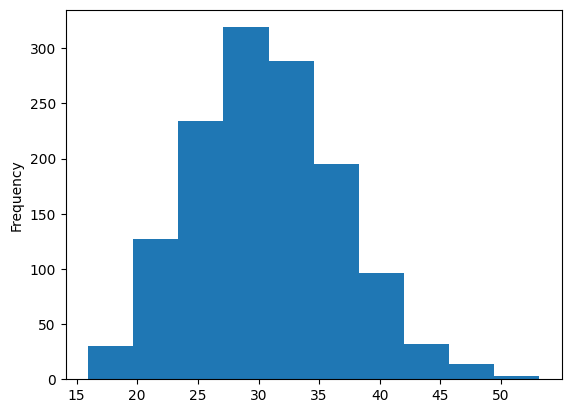

In [ ]:
x['bmi'].plot(kind='hist')

In [ ]:
# Lets start fresh
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #turns all these values in these col to 0-1
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

x = insurance.drop('charges', axis = 1)
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# fit the col trans to training data
ct.fit(x_train)

# Transform training and test data with normalisation (MinMaxScalar) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)




In [ ]:
# What does our data look like
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

### Now build the neural network model now for the normalised data

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

insurance_model.fit(x_train_normal, y_train, epochs = 100)
#

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13297.4834 - mae: 13297.4834
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13290.8643 - mae: 13290.8643 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13273.4893 - mae: 13273.4893 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13234.9736 - mae: 13234.9736 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13164.6221 - mae: 13164.6221 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13051.8887 - mae: 13051.8887
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12886.3887 - mae: 12886.3887 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12657.8047 - mae: 12657.8047 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12355.8008 - mae: 12355.8008 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11972.4375 - mae: 11972.4375
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11514.3096 - mae: 11514.3096 
Epoch 12/100
34/34 ━━━

In [ ]:
# evaluate the model
insurance_model.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3520.1072 - mae: 3520.1072  


[3433.92626953125, 3433.92626953125]

In [ ]:
insurance_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)